In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from netCDF4 import Dataset 
import matplotlib.pyplot as plt
from glob import glob
import os
import xarray as xr
from os.path import exists, join

In [2]:
dam_coords = (39.538889, -121.485556)

In [3]:
lme_month_dir = "/glade/p/cesm0005/CESM-CAM5-LME/atm/proc/tseries/monthly/"
lme_daily_dir = "/glade/p/cesm0005/CESM-CAM5-LME/atm/proc/tseries/daily/"
sorted(glob(lme_month_dir + "*"))

['/glade/p/cesm0005/CESM-CAM5-LME/atm/proc/tseries/monthly/ABSORB',
 '/glade/p/cesm0005/CESM-CAM5-LME/atm/proc/tseries/monthly/AEROD_v',
 '/glade/p/cesm0005/CESM-CAM5-LME/atm/proc/tseries/monthly/ALBTOA',
 '/glade/p/cesm0005/CESM-CAM5-LME/atm/proc/tseries/monthly/ALBTOA..',
 '/glade/p/cesm0005/CESM-CAM5-LME/atm/proc/tseries/monthly/ALBTOAC',
 '/glade/p/cesm0005/CESM-CAM5-LME/atm/proc/tseries/monthly/ALBTOM',
 '/glade/p/cesm0005/CESM-CAM5-LME/atm/proc/tseries/monthly/ANRAIN',
 '/glade/p/cesm0005/CESM-CAM5-LME/atm/proc/tseries/monthly/ANSNOW',
 '/glade/p/cesm0005/CESM-CAM5-LME/atm/proc/tseries/monthly/AOA1',
 '/glade/p/cesm0005/CESM-CAM5-LME/atm/proc/tseries/monthly/AOA1SRC',
 '/glade/p/cesm0005/CESM-CAM5-LME/atm/proc/tseries/monthly/AOA2',
 '/glade/p/cesm0005/CESM-CAM5-LME/atm/proc/tseries/monthly/AOA2SRC',
 '/glade/p/cesm0005/CESM-CAM5-LME/atm/proc/tseries/monthly/AODABS',
 '/glade/p/cesm0005/CESM-CAM5-LME/atm/proc/tseries/monthly/AODDUST1',
 '/glade/p/cesm0005/CESM-CAM5-LME/atm/proc/t

In [4]:
nc_file = join(lme_daily_dir, "PRECT", "b.e11.BLMTRC5CN.f19_g16.002.cam.h1.PRECT.08500101-18491231.nc")
d = Dataset(nc_file)

In [6]:
d.variables["PRECT"].shape

(365000, 96, 144)

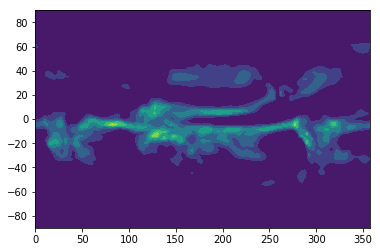

In [62]:
plt.contourf(d.variables["lon"][:], d.variables["lat"][:], d.variables["PRECC"][25])

In [5]:
lats = d.variables["lat"][:]
lons = d.variables["lon"][:]

In [6]:
np.argmin(np.abs(dam_coords[0] - lats)), np.argmin(np.abs(dam_coords[1] + 360 - lons))



(68, 95)

In [7]:
all_dates = d.variables["date"][:]

In [17]:
all_dates_str = pd.Series(all_dates.astype("U8"))
all_days = all_dates_str.str[-2:].astype(int)
all_months = all_dates_str.str[-4:-2].astype(int)
all_years = all_dates_str.str[:-4].astype(int)

In [25]:
dec_years = all_years[:]
dec_years[all_months == 12] += 1

In [26]:
valid_months = np.where(np.in1d(all_months.values, [12, 1, 2]) & (dec_years > 850) & (dec_years < 1850))[0]

In [28]:
prec = d.variables["PRECT"][valid_months, 68, 95]

In [29]:
daily_precip = pd.DataFrame({"month": all_months[valid_months],
                             "year": dec_years[valid_months],
                             "day": all_days[valid_months],
                             "precip": prec * 86400 * 1000}, columns=["year", "month", "day", "precip"])

In [ ]:
plt.figure(figsize=(20, 5))
winter_precip = daily_precip.groupby(["year"])["precip"].sum()
(winter_precip / 25.4).plot()
plt.xlabel("Year", fontsize=12)
plt.ylabel("DJF Rainfall", fontsize=12)
plt.title("NCAR LME Member 2 Oroville, CA DJF Rainfall")

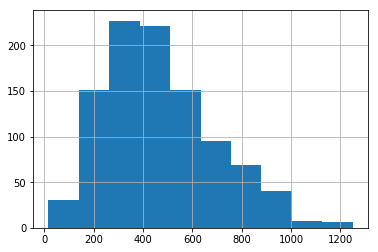

In [37]:
winter_precip.hist()

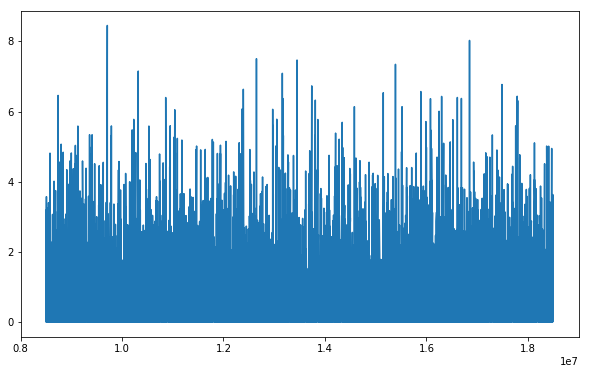

In [56]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(d["date"][:], prec[:, 68, 95] * 86400 * 1000)

(array([  7.46000000e+03,   2.36600000e+03,   1.22300000e+03,
          5.26000000e+02,   2.45000000e+02,   1.12000000e+02,
          3.80000000e+01,   2.10000000e+01,   7.00000000e+00,
          2.00000000e+00]),
 array([ 0.       ,  0.8452869,  1.6905738,  2.5358607,  3.3811476,
         4.2264345,  5.0717214,  5.9170083,  6.7622952,  7.6075821,
         8.452869 ]),
 <a list of 10 Patch objects>)

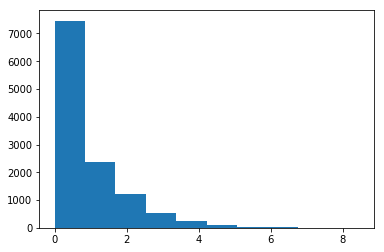

In [57]:
plt.hist(prec[:, 68, 95] * 86400 * 1000)

In [48]:
psl_file = join(lme_month_dir, "PSL", "b.e11.BLMTRC5CN.f19_g16.002.cam.h0.PSL.085001-184912.nc")
ps_ds = Dataset(psl_file)

In [ ]:
ps_dates = pd.Series(ps_ds.variables["date"][:].astype("U8"))
ps_months = ps_dates.str[-4:-2]
nov_months = np.where(ps_months == "11")[0]
ps_fields = ps_ds.variables["PSL"][nov_months]

0        02
1        03
2        04
3        05
4        06
5        07
6        08
7        09
8        10
9        11
10       12
11       01
12       02
13       03
14       04
15       05
16       06
17       07
18       08
19       09
20       10
21       11
22       12
23       01
24       02
25       03
26       04
27       05
28       06
29       07
         ..
11970    08
11971    09
11972    10
11973    11
11974    12
11975    01
11976    02
11977    03
11978    04
11979    05
11980    06
11981    07
11982    08
11983    09
11984    10
11985    11
11986    12
11987    01
11988    02
11989    03
11990    04
11991    05
11992    06
11993    07
11994    08
11995    09
11996    10
11997    11
11998    12
11999    01
Length: 12000, dtype: object